In [1]:
import pandas as pd

df = pd.read_csv('../workspace/data/publish_history.csv')
test_url = "http://mp.weixin.qq.com/s?__biz=MzU2NzQ1NDAwNg==&mid=2247484132&idx=1&sn=661f20d4eaefd9765b4bd952fada44c1&chksm=fc9db2bdcbea3bab929e91ccf8b39685c4949f3625bcc1c8e379e489edeae408f2a34dfd7def#rd"
df


,内容标题,发表时间,总阅读人数,总阅读次数,总分享人数,总分享次数,阅读后关注人数,送达人数,公众号消息阅读次数,送达阅读率,首次分享次数,分享产生阅读次数,首次分享率,每次分享带来阅读次数,阅读完成率,内容url,账号名称
0,全球首部AI监管法案正在杀死欧洲创新？布鲁塞尔的官僚们醒醒吧,2025-09-02,1,7,1,2,0,32,0,0.000,0,0,NaN,0.000,0.000,http://mp.weixin.qq.com/s?__biz=MzU2NzQ1NDAwNg...,AI 万象志
1,从0到1打造H5 AI对话页面：技术选型、实现细节与优化策略,2025-09-02,2,5,0,0,0,32,0,0.000,0,0,NaN,NaN,0.000,http://mp.weixin.qq.com/s?__biz=MzU2NzQ1NDAwNg...,AI 万象志
2,数字员工PUA指南？从调教到默契：超级麦吉又更新啦：【长期记忆】,2025-09-01,4,10,1,3,0,32,1,0.031,0,3,0.0,1.000,0.667,http://mp.weixin.qq.com/s?__biz=MzU2NzQ1NDAwNg...,AI 万象志
3,我们调研了100个AI项目，发现能活下来的都有一个共同点：卖水人,2025-09-01,2,3,1,1,0,32,1,0.031,0,0,0.0,0.000,1.000,http://mp.weixin.qq.com/s?__biz=MzU2NzQ1NDAwNg...,AI 万象志
4,AI世界的“出埃及记”：精英们正在逃离Meta的应许之地,2025-08-28,2,12,1,5,0,32,2,0.062,0,1,0.0,0.200,0.500,http://mp.weixin.qq.com/s?__biz=MzU2NzQ1NDAwNg...,AI 万象志
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,新手避坑，老手增效：一份不该错过的「文档格式百科全书」,2025-08-28,6,14,2,7,0,5,5,1.000,1,8,0.2,1.143,0.667,http://mp.weixin.qq.com/s?__biz=MzYyNDA1MDY0Mw...,野路子思考局
156,"为什么成年人一学习就想逃？原来我们都缺了这朵""小红花""",2025-08-26,9,10,0,0,0,5,1,0.200,0,0,0.0,NaN,0.429,http://mp.weixin.qq.com/s?__biz=MzYyNDA1MDY0Mw...,野路子思考局
157,如何像诺奖得主一样思考？费曼学习法：不只是技巧，更是思维模式,2025-08-25,44,68,11,17,2,3,2,0.667,4,29,2.0,1.706,0.231,http://mp.weixin.qq.com/s?__biz=MzYyNDA1MDY0Mw...,野路子思考局
158,向阳而生：在爱与成长中绽放光芒,2025-08-21,23,26,0,0,0,3,3,1.000,0,0,0.0,NaN,0.526,http://mp.weixin.qq.com/s?__biz=MzYyNDA1MDY0Mw...,野路子思考局


In [10]:
import requests
import sys

# 使用core/web2md/gzh_url2md.py中的extract_text_content函数获取文章正文
sys.path.append("../core/web2md")
from gzh_url2md import extract_text_content

def fetch_text(url):
    # 以test_url为例，获取正文内容
    result = extract_text_content(test_url, include_stats=True)
    if result and result.get("success"):
        title = result.get("title", "无标题")
        text = result.get("text", "")
        word_count = len(text)

        print(f"标题：{title}")
        print(f"字数：{word_count}")
        print(f"正文：{text}")
        
        return text
    else:
        print("提取失败：", result.get("error", "未知错误"))


    


In [11]:
# 批量获取所有文章正文，并添加到df中

# 新建一列用于存储正文内容
df['正文内容'] = None

for idx, row in df.iterrows():
    url = row['内容url']
    try:
        result = extract_text_content(url, include_stats=True)
        if result and result.get("success"):
            text = result.get("text", "")
            df.at[idx, '正文内容'] = text
        else:
            df.at[idx, '正文内容'] = ""
            print(f"第{idx}行提取失败：{result.get('error', '未知错误')}")
    except Exception as e:
        df.at[idx, '正文内容'] = ""
        print(f"第{idx}行发生异常：{e}")

# 可选：保存带正文的新表格
# df.to_csv('../workspace/data/publish_history_with_text.csv', index=False)

df.head()


找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
使用body作为内容区域
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域: #js_content
找到内容区域:

,内容标题,发表时间,总阅读人数,总阅读次数,总分享人数,总分享次数,阅读后关注人数,送达人数,公众号消息阅读次数,送达阅读率,首次分享次数,分享产生阅读次数,首次分享率,每次分享带来阅读次数,阅读完成率,内容url,账号名称,正文内容
0,全球首部AI监管法案正在杀死欧洲创新？布鲁塞尔的官僚们醒醒吧,2025-09-02,1,7,1,2,0,32,0,0.000,0,0,NaN,0.0,0.000,http://mp.weixin.qq.com/s?__biz=MzU2NzQ1NDAwNg...,AI 万象志,当理想主义的监管遇上现实主义的创新，谁会笑到最后？ 各位AI万象志的读者，大家好。 今天我们...
1,从0到1打造H5 AI对话页面：技术选型、实现细节与优化策略,2025-09-02,2,5,0,0,0,32,0,0.000,0,0,NaN,NaN,0.000,http://mp.weixin.qq.com/s?__biz=MzU2NzQ1NDAwNg...,AI 万象志,在AI应用遍地开花的今天，每个开发者都可能面临这样的场景：老板拍板要做AI对话功能，你满怀信...
2,数字员工PUA指南？从调教到默契：超级麦吉又更新啦：【长期记忆】,2025-09-01,4,10,1,3,0,32,1,0.031,0,3,0.0,1.0,0.667,http://mp.weixin.qq.com/s?__biz=MzU2NzQ1NDAwNg...,AI 万象志,"AI助手终于不再""失忆""：超级麦吉长期记忆功能深度体验 9月1日，一个值得AI从业者关注的日..."
3,我们调研了100个AI项目，发现能活下来的都有一个共同点：卖水人,2025-09-01,2,3,1,1,0,32,1,0.031,0,0,0.0,0.0,1.000,http://mp.weixin.qq.com/s?__biz=MzU2NzQ1NDAwNg...,AI 万象志,独家观察 | 当AI从概念走向现实，钱究竟被谁赚走了？ 开篇洞察：繁华背后的商业真相 202...
4,AI世界的“出埃及记”：精英们正在逃离Meta的应许之地,2025-08-28,2,12,1,5,0,32,2,0.062,0,1,0.0,0.2,0.500,http://mp.weixin.qq.com/s?__biz=MzU2NzQ1NDAwNg...,AI 万象志,"在AI竞赛愈发激烈的今天，人才争夺战已经白热化。然而，就在Meta雄心勃勃推进""超级智能""计..."


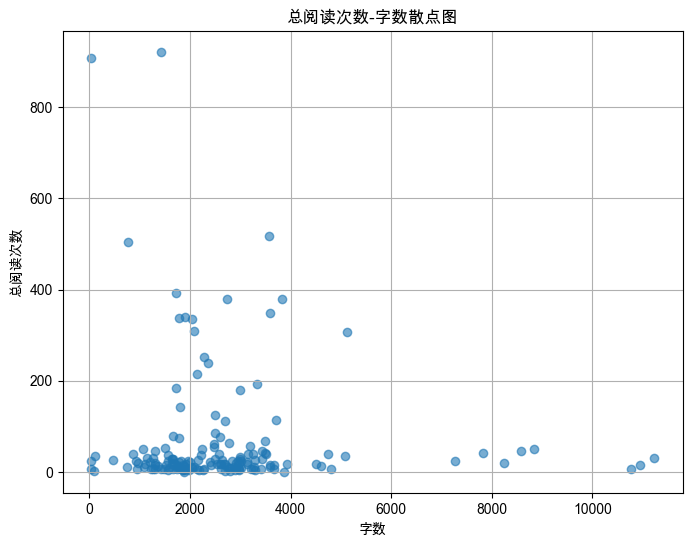

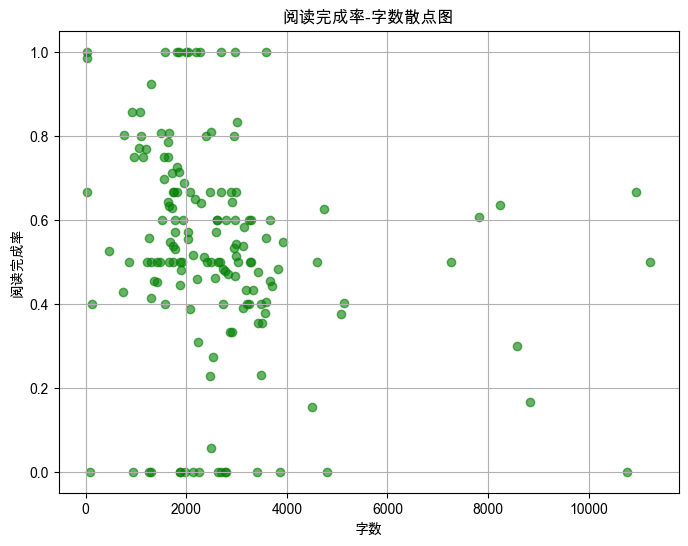

In [15]:
# 统计每一篇文章的字数，并添加为新列“字数”
df['字数'] = df['正文内容'].apply(lambda x: len(str(x)) if x is not None else 0)

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['PingFang SC', 'Heiti SC', 'SimHei', 'Arial Unicode MS']
matplotlib.rcParams['axes.unicode_minus'] = False

# 绘制“总阅读次数-字数”散点图
plt.figure(figsize=(8, 6))
plt.scatter(df['字数'], df['总阅读次数'], alpha=0.6)
plt.xlabel('字数')
plt.ylabel('总阅读次数')
plt.title('总阅读次数-字数散点图')
plt.grid(True)
plt.show()

# 绘制“阅读完成率-字数”散点图
plt.figure(figsize=(8, 6))
plt.scatter(df['字数'], df['阅读完成率'], alpha=0.6, color='green')
plt.xlabel('字数')
plt.ylabel('阅读完成率')
plt.title('阅读完成率-字数散点图')
plt.grid(True)
plt.show()



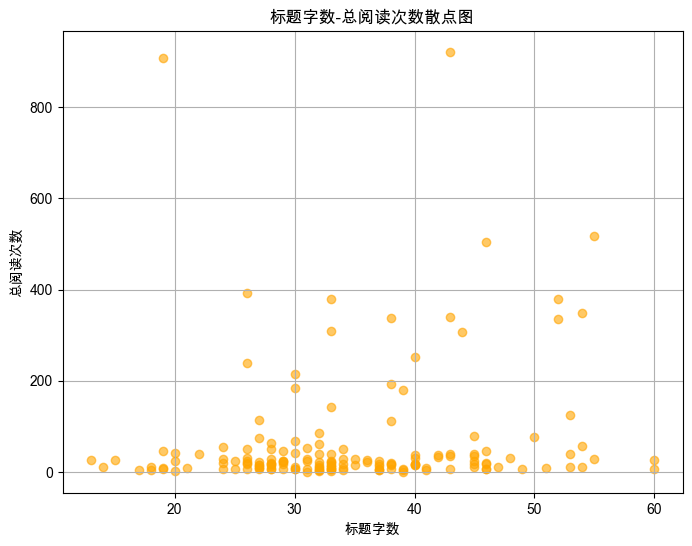

In [14]:
# 绘制“标题字数-总阅读次数”散点图
plt.figure(figsize=(8, 6))
df['标题字数'] = df['内容标题'].apply(lambda x: len(str(x)) if x is not None else 0)
plt.scatter(df['标题字数'], df['总阅读次数'], alpha=0.6, color='orange')
plt.xlabel('标题字数')
plt.ylabel('总阅读次数')
plt.title('标题字数-总阅读次数散点图')
plt.grid(True)
plt.show()


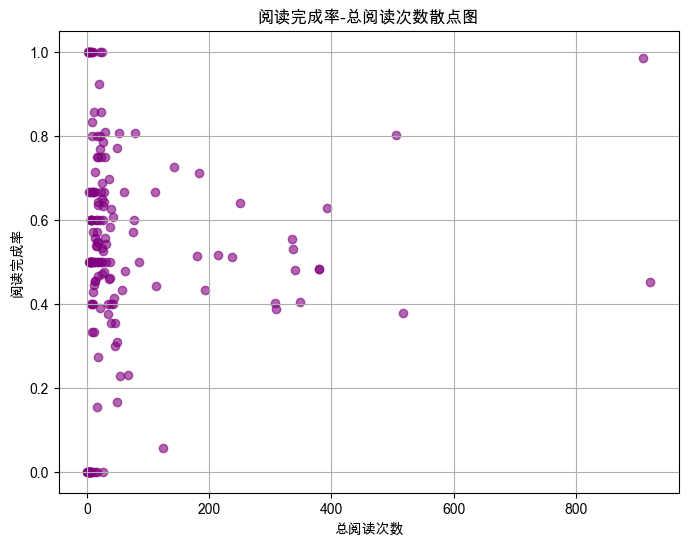

In [16]:
# 绘制“阅读完成率-总阅读次数”散点图
plt.figure(figsize=(8, 6))
plt.scatter(df['总阅读次数'], df['阅读完成率'], alpha=0.6, color='purple')
plt.xlabel('总阅读次数')
plt.ylabel('阅读完成率')
plt.title('阅读完成率-总阅读次数散点图')
plt.grid(True)
plt.show()


                                                  内容标题  图片数
95                   DeepSeek生态爆发：200+开源工具让AI彻底融入你的工作流    0
21   一人成军？超级麦吉项目模式实测：并行100份研报、50个方案，定义全新AI工作方式【Vibe...    0
77              从脑科学到Agent：如何实践领域知识的神经启发式建模，复现人类专家思维过程    0
59      AI画图终于不再“文字乱码”！Qwen-Image背后的技术细节、数据工程与行业影响深度解析    0
58          AI象棋巅峰对决：Grok 4突围，Gemini意外出局，马斯克的“副作用”真有料？    0
73                         Manus 裁员了，却不是坏事？藏着AI行业的未来风向    0
105  终于不是“ClosedAI”，深夜发布GPT开源版120B和20B，本地部署20B实测：速度...    0
15                    24小时，3个颠覆级AI项目诞生！这场黑客马拉松藏着多少黑科技？    0
49                  字节开源Seed-OSS-36B模型：支持可控思维链与512K上下文    0
124  为什么说Perplexity值140亿美金？苹果Meta抢破头的AI搜索，藏着搜索行业的终局密码？    0
